In [1]:
!pip install rfpimp
import rfpimp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10650 sha256=b9b0fb3a5f6b4a5f4cfdad623159679bcd91487c0cbc7b205dbf3c69af8b8f93
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp


##Importing Dataset and Splitting

In [3]:
data = pd.read_csv('drag_coef.csv')
features = ['phi','Re','Cd,meas']
data_train, data_test = train_test_split(data, test_size=0.20)
data_train = data_train[features]
data_test = data_test[features]

X_train, y_train = data_train.drop('Cd,meas',axis=1), data_train['Cd,meas']
X_test, y_test = data_test.drop('Cd,meas',axis=1), data_test['Cd,meas']

##Training Using Random Forest Regressor

In [4]:
randomforest = RandomForestRegressor(n_estimators=100, n_jobs=-1)
randomforest.fit(X_train, y_train)

imp = rfpimp.importances(randomforest, X_test, y_test)

##Histogram Plotting of Feature Importance

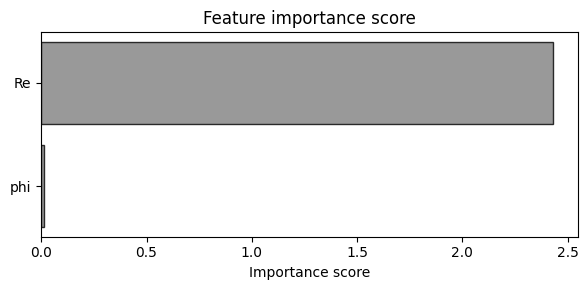

In [5]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance score')
ax.set_yticks(imp.index)
ax.set_yticklabels(imp.index)
plt.gca().invert_yaxis()

fig.tight_layout()